# This Notebook is an exploration of the Worldbank data

The python Package is an implementation of the Worldbank API (https://datahelpdesk.worldbank.org/knowledgebase/articles/889386-developer-information-overview)

The Worlbank data is fully accesable through that API. The Data is available from 1960 on and is updated on monthly basis. Some indicators are not reported on a yearly basis (maybe every 5 year or other irregular basis)
All countries are included except Taiwan. 


In [1]:
#%pip install world_bank_data --upgrade
#%pip install wbgapi --upgrade


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for world_bank_data: filename=world_bank_data-0.1.3-py3-none-any.whl size=11119 sha256=80d984d5b14f6e202cc03177779b045fb5d896a72955165593dbcc26243713ad
  Stored in directory: c:\users\joana\appdata\local\pip\cache\wheels\a3\ba\6f\7040ac2cf2d06ed4633fb9dd8bc2000a0cabf766b5a17d4d1a
Successfully built world_bank_data
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import world_bank_data as wb
import requests
sys.path.append('../')
from utils import get_data
import matplotlib.pyplot as plt



NameError: name 'sys' is not defined

## Displaying the different topics included within the worldbank data 

In [ ]:
pd.set_option('display.max_rows', 21)
wb.get_topics()

,value,sourceNote
id,,
1,Agriculture & Rural Development,For the 70 percent of the world's poor who liv...
2,Aid Effectiveness,Aid effectiveness is the impact that aid has i...
3,Economy & Growth,Economic growth is central to economic develop...
4,Education,Education is one of the most powerful instrume...
5,Energy & Mining,The world economy needs ever-increasing amount...
6,Environment,Natural and man-made environmental resources –...
7,Financial Sector,An economy's financial markets are critical to...
8,Health,Improving health is central to the Millennium ...
9,Infrastructure,Infrastructure helps determine the success of ...


## Displaying the different countries included within the worldbank data 

In [ ]:
wb.get_countries()

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
AFW,ZI,Africa Western and Central,Aggregates,,Aggregates,Aggregates,,NaN,NaN
...,...,...,...,...,...,...,...,...,...
XZN,A5,Sub-Saharan Africa excluding South Africa and ...,Aggregates,,Aggregates,Aggregates,,NaN,NaN
YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Sana'a,44.2075,15.3520
ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.7460


## Look at the basic information about a country

In [ ]:
wb.search_countries('Pakistan')

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
PAK,PK,Pakistan,South Asia,South Asia,Lower middle income,Blend,Islamabad,72.8,30.5167


## Searching for specific indicators per sources

In [ ]:
wb.get_indicators(topic=3, source=2)  # topic and source id are from get_topics/get_sources


,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
BG.GSR.NFSV.GD.ZS,Trade in services (% of GDP),,World Development Indicators,Trade in services is the sum of service export...,"International Monetary Fund, Balance of Paymen...","Economy & Growth,Private Sector,Trade"
BM.GSR.CMCP.ZS,"Communications, computer, etc. (% of service i...",,World Development Indicators,"Communications, computer, information, and oth...","International Monetary Fund, Balance of Paymen...","Economy & Growth,Trade"
BM.GSR.FCTY.CD,"Primary income payments (BoP, current US$)",,World Development Indicators,Primary income payments refer to employee comp...,"International Monetary Fund, Balance of Paymen...",Economy & Growth
BM.GSR.GNFS.CD,"Imports of goods and services (BoP, current US$)",,World Development Indicators,Imports of goods and services comprise all tra...,"International Monetary Fund, Balance of Paymen...","Economy & Growth,Trade"
BM.GSR.INSF.ZS,Insurance and financial services (% of service...,,World Development Indicators,Insurance and financial services cover various...,"International Monetary Fund, Balance of Paymen...","Economy & Growth,Private Sector,Trade"
...,...,...,...,...,...,...
NY.TTF.GNFS.KN,Terms of trade adjustment (constant LCU),,World Development Indicators,The terms of trade effect equals capacity to i...,"World Bank national accounts data, and OECD Na...",Economy & Growth
PA.NUS.ATLS,DEC alternative conversion factor (LCU per US$),,World Development Indicators,The DEC alternative conversion factor is the u...,"International Monetary Fund, International Fin...","Economy & Growth,Financial Sector"
PA.NUS.PPP,"PPP conversion factor, GDP (LCU per internatio...",,World Development Indicators,Purchasing power parity (PPP) conversion facto...,"International Comparison Program, World Bank |...",Economy & Growth


## Searching for specific values for a given time
This one was expecially to test out for how fas in the past the data was stored. The oldest entries are from 1960. 

In [ ]:
wb.get_series('SP.POP.TOTL', date='1960', id_or_value='id', simplify_index=True)


Country
AFE    130692579.0
AFW     97256290.0
ARB     93359407.0
CSS      4209141.0
CEB     91401764.0
          ...     
VIR        32500.0
PSE            NaN
YEM      5542459.0
ZMB      3119430.0
ZWE      3806310.0
Name: SP.POP.TOTL, Length: 266, dtype: float64

## ID's of indicators and API Calls

Another possibility to access the worldbank 
ids of indicators can easily be accesed over the website of worldbank : https://data.worldbank.org/indicator

After choosing a indicator e.g. 'Access to electricity' (% of population) the ID of the indicator can be copied from the Link Part after /indicator/ (https://data.worldbank.org/indicator/EG.ELC.ACCS.ZS?view=chart) ID = EG.ELC.ACCS.ZS

For easier usage im now continueing with the other API 'wbgapi'

In [ ]:
import wbgapi as wb

In [ ]:
# It's also possible to enter search terms in order to find the ID's of a topic
wb.search('access to electricity')

ID,Name,Field,Value
EG.ELC.ACCS.RU.ZS,,IndicatorName,"Access to electricity, rural (% of rural population)"
EG.ELC.ACCS.RU.ZS,,Longdefinition,"Access to electricity, rural is the percentage of rural population with access to electricity."
EG.ELC.ACCS.RU.ZS,,Statisticalconceptandmethodology,...Data for access to electricity are collected among different sources: mostly data from nationally...
EG.ELC.ACCS.UR.ZS,,IndicatorName,"Access to electricity, urban (% of urban population)"
EG.ELC.ACCS.UR.ZS,,Longdefinition,"Access to electricity, urban is the percentage of urban population with access to electricity."
EG.ELC.ACCS.UR.ZS,,Statisticalconceptandmethodology,...Data for access to electricity are collected among different sources: mostly data from nationally...
EG.ELC.ACCS.ZS,,Developmentrelevance,"... grow crops or deliver goods to consumers without using some form of energy. Access to electricity is particularly crucial to human development as electricity is, in practice,..."
EG.ELC.ACCS.ZS,,IndicatorName,Access to electricity (% of population)
EG.ELC.ACCS.ZS,,Longdefinition,"...Access to electricity is the percentage of population with access to electricity. Electrification data are collected from industry, national surveys and..."
EG.ELC.ACCS.ZS,,Statisticalconceptandmethodology,...Data for access to electricity are collected among different sources: mostly data from nationally...


In [ ]:
id_indicator = 'EG.ELC.ACCS.ZS'
countries = ['IND', 'CH']

In [ ]:
energy_access_india = wb.data.DataFrame(id_indicator, countries).transpose()

In [ ]:
# transform into pandas df and print 
energy_access= pd.DataFrame(energy_access_india)
energy_access = energy_access_india.dropna()
print(energy_access)


economy        IND
YR1993   50.900000
YR1994   49.811310
YR1995   51.408775
YR1996   53.003521
YR1997   54.594864
...            ...
YR2016   89.217796
YR2017   92.124947
YR2018   95.699997
YR2019   97.308266
YR2020   99.000000

[28 rows x 1 columns]


<Axes: title={'center': 'acces to electricity in % of population'}>

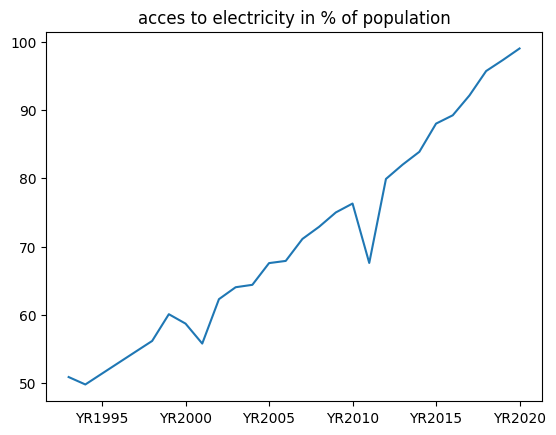

In [ ]:
# draw a linechart for india
energy_access_india['IND'].plot(x='IND', kind = 'line', title = 'acces to electricity in % of population')

## Different approach to get the data 
I found that the usage of this kind of API's can have a long processing time. Therefore it could be more sufficient to directly pull the json format from the webpages as follows.


In [ ]:
# fetching data directly from a api
url = 'http://api.worldbank.org/v2/country/ind;usa/indicator/EG.ELC.ACCS.ZS?format=json'


# Make the request to the World Bank Data API
response = requests.get(url)
# Parse the response as JSON
data = response.json()


In [ ]:
# Dynamical usage of the API

# defining the default url and parameters
url = 'https://api.worldbank.org/v2/'
id_indicator = 'EG.ELC.ACCS.ZS'
countries = ['ind']

# create a new url
requesting_url = url + f'country/{";".join(countries)}/indicator/{id_indicator}''?format=json'

response = requests.get(requesting_url)

# Parse the JSON response and extract the data
if response.ok:
    data = response.json()

else:
    print('Error: Request failed with status', response.status_code)

# Accessing values, dates, and countries
values = []
dates = []
countries = []

# Extract values, dates, and countries from the JSON data
for item in data[1]:
    values.append(item['value'])
    dates.append(item['date'])
    countries.append(item['country']['value'])

# create a dataframe out of that
data = {'Country': countries, 'Date': dates, 'Value': values}
df = pd.DataFrame(data)


## Function to collect the data
I wrote a Function 'get_data' in order to collect the data. (utils.py)
it takes the indicator id and the countries we want to have the data for as an input and delivers a dataframe as an Output.

In [ ]:
# define the indicator and country
id_indicator = 'EG.ELC.ACCS.ZS'
countries = ['ind', 'npl']

# run the get_data function
df = get_data(id_indicator, countries)

In [ ]:
# look at the data
df

,Country,Date,Value
0,India,2022,NaN
1,India,2021,NaN
2,India,2020,99.000000
3,India,2019,97.308266
4,India,2018,95.699997
...,...,...,...
95,Nepal,1977,NaN
96,Nepal,1976,NaN
97,Nepal,1975,NaN
98,Nepal,1974,NaN


In [ ]:
# filter out the Data which we dont have 
df = df[ (df["Date"] <= 2020) & (df["Date"] >= 1993) ]

# fill in the Nulls
df_filled = df.fillna(method='ffill')

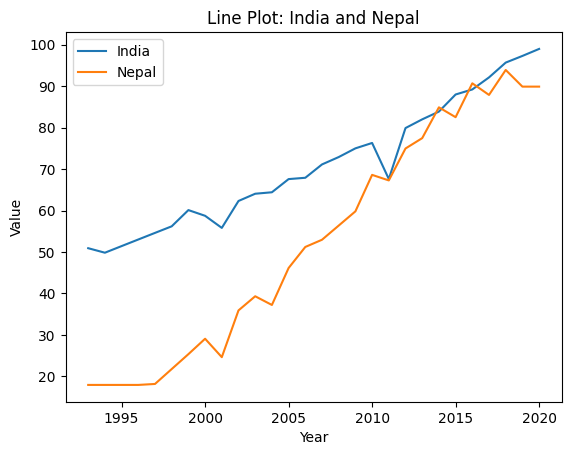

In [ ]:
# Create a lineplot
df_filled = df_filled.pivot(index='Date', columns='Country', values='Value')

df_filled.plot.line()
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Plot: India and Nepal')
plt.legend()
plt.show()